In [6]:
"""
Authors: Viktoriia Vlasenko
"""
#!/usr/bin/python


import re
import numpy as np
import matplotlib.pyplot as plt

#CONSTANTS
number_of_Na = 19
number_of_Bi = 17
number_of_Ti = 36
number_of_O = 106

potim = 3                               #timestep from INCAR file
readfile = open('2.XDATCAR',"r")        #input XDATCAR file in format XDATCAR
z=0                                     #counter
natoms=0                                #number of atoms in XDATCAR file
posion = []                             #atom positions in Cartesian coordinates
confcount = 0                           #number of structures in XDATCAR file
direct=[]                               #number of time steps for each structure in XDATCAR file
a=[]                                    #lattice parameter in 1st dimension
b=[]                                    #lattice parameter in 2nd dimension
c=[]                                    #lattice parameter in 3rd dimension
#read in XDATCAR file
line=readfile.readline()
while (line):
  z=z+1
  line.strip()
  line=re.sub('^',' ',line)
  y=line.split()
  if (z==2):
     scale=float(y[0])
  if (z==3):
     a.append(float(y[0])*10**(-8))
     a.append(float(y[1])*10**(-8))
     a.append(float(y[2])*10**(-8))
     a_len=(a[0]*a[0]+a[1]*a[1]+a[2]*a[2])**0.5
  if (z==4):
     b.append(float(y[0])*10**(-8))
     b.append(float(y[1])*10**(-8))
     b.append(float(y[2])*10**(-8))
     b_len=(b[0]*b[0]+b[1]*b[1]+b[2]*b[2])**0.5
  if (z==5):
     c.append(float(y[0])*10**(-8))
     c.append(float(y[1])*10**(-8))
     c.append(float(y[2])*10**(-8))
     c_len=(c[0]*c[0]+c[1]*c[1]+c[2]*c[2])**0.5
  if (z==7):
     natoms=int(y[3])
  if (y[0]=="Direct"):
     direct.append(int(y[2]))
     posion.append([])
     for i in range(178):
        line=readfile.readline()
        if number_of_Na+number_of_Bi+number_of_Ti <= i < 178:
           line.strip()
           line=re.sub('^',' ',line)
           f=line.split()
           cartpos_x=a[0]*float(f[0])+a[1]*float(f[1])+a[2]*float(f[2])
           cartpos_y=b[0]*float(f[0])+b[1]*float(f[1])+b[2]*float(f[2])
           cartpos_z=c[0]*float(f[0])+c[1]*float(f[1])+c[2]*float(f[2])
           #positions of ions for each structure are obtained here
           posion[confcount].append([cartpos_x,cartpos_y,cartpos_z])
     confcount=confcount+1
  line=readfile.readline()
readfile.close


<function TextIOWrapper.close()>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


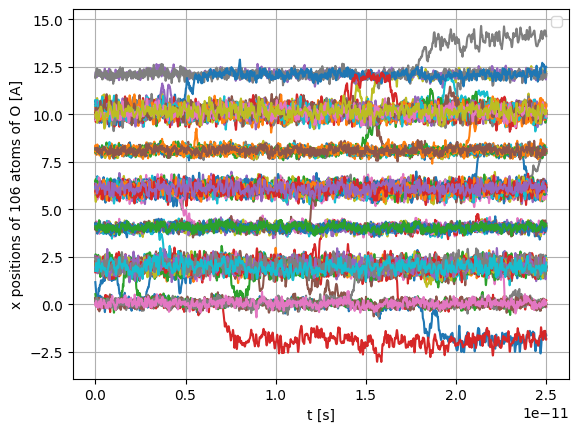

In [7]:
for i in range(0,confcount-1):
   d = 0
   for j in range(0,number_of_O):
      #if length is larger than 0.5 (in crystallographic coordinates) then we have to shift atom
      #due to periodic image to obtain the shortest distance.
      #periodic boundary conditions
      x_diff=posion[i+1][j][0]-posion[i][j][0]
      if (abs(x_diff)>(0.5*a_len)):
         if (x_diff<0):
            x_diff=x_diff+a_len
         elif (x_diff>0):
            x_diff=x_diff-a_len
      y_diff=posion[i+1][j][1]-posion[i][j][1]
      if (abs(y_diff)>(0.5*b_len)):
         if (y_diff<0):
            y_diff=y_diff+b_len
         elif (y_diff>0):
            y_diff=y_diff-b_len
      z_diff=posion[i+1][j][2]-posion[i][j][2]
      if (abs(z_diff)>(0.5*c_len)):
         if (z_diff<0):
            z_diff=z_diff+c_len
         elif (z_diff>0):
            z_diff=z_diff-c_len
            
      posion[i+1][j][0] = posion[i][j][0] + x_diff
      posion[i+1][j][1] = posion[i][j][1] + y_diff
      posion[i+1][j][2] = posion[i][j][2] + z_diff

listax = np.zeros((len(posion), number_of_O))
listay = np.zeros((len(posion), number_of_O))
listaz = np.zeros((len(posion), number_of_O))
for i in range(0, len(posion)):
   for j in range(0,number_of_O):
      listax[i][j] = posion[i][j][0]*10**8
      listay[i][j] = posion[i][j][1]*10**8
      listaz[i][j] = posion[i][j][2]*10**8

fig, ax = plt.subplots()
time = np.linspace(0, 25000, 2500)*10**(-15)
ax.plot(time, listax)
ax.set_xlabel('t [s]')
ax.set_ylabel('x positions of 106 atoms of O [A]')
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.legend()
plt.show()

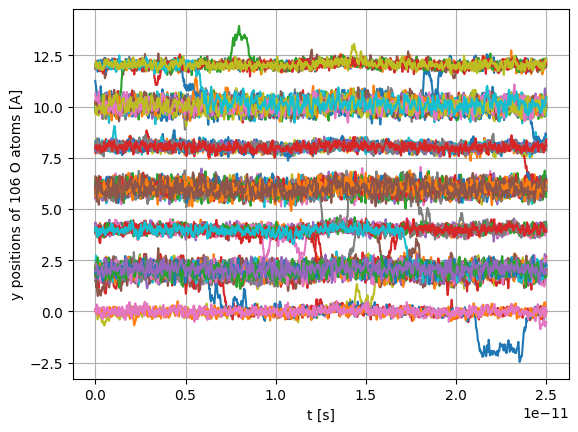

In [8]:
time = np.linspace(0, 25000, 2500)*10**(-15)
plt.plot(time, listay)
plt.xlabel('t [s]')
plt.ylabel('y positions of 106 O atoms [A]')
plt.grid(True)
plt.show()

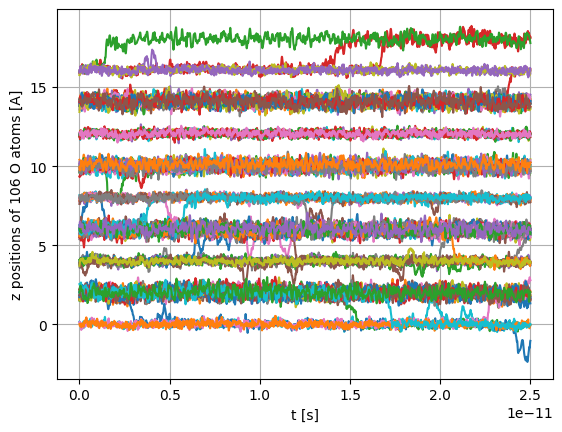

In [9]:
time = np.linspace(0, 25000, 2500)*10**(-15)
plt.plot(time, listaz)
plt.xlabel('t [s]')
plt.ylabel('z positions of 106 O atoms [A]')
plt.grid(True)
plt.show()

D z wykresu = 1.1424050929616705e-06


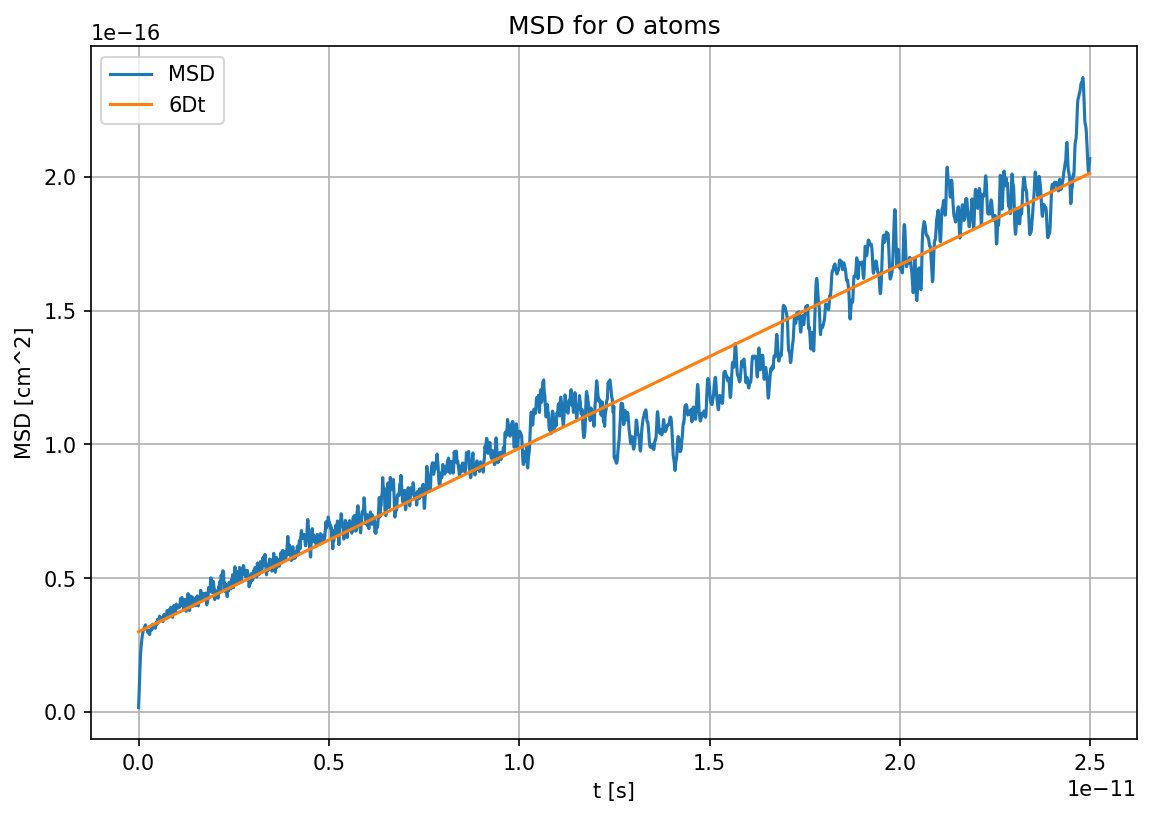

In [10]:
#MSD calculating
msd = np.zeros((confcount, confcount))
msd_res = []
for i in range(1, confcount):
    msd_res.append(0)

msd2 = []
for j in range(0,number_of_O):
    msd_per_atom = []
    for window in range(1, confcount):
        msd_ = []
        for i in range(0, confcount-window, window):
            x_diff=posion[i+window][j][0]-posion[i][j][0]
            y_diff=posion[i+window][j][1]-posion[i][j][1]
            z_diff=posion[i+window][j][2]-posion[i][j][2]
            msd_.append((x_diff**2.0+y_diff**2.0+z_diff**2.0))
        msd_per_atom.append(np.mean(msd_))
    msd2.append(msd_per_atom)


msd2 = np.array(msd2)
time = np.linspace(0, 24990, 2499)*10**(-15) #s

fig, ax = plt.subplots(dpi=150, figsize=(9, 6))
ax.plot(time, np.mean(msd2, 0), label='MSD')
a, b = np.polyfit(time, np.mean(msd2, 0), deg=1)
ax.plot(time, time*a + b, label="6Dt")
print(f"D z wykresu = {a/6}") #cm^2/s

ax.set_xlabel('t [s]')
ax.set_ylabel('MSD [cm^2]')
ax.set_title('MSD for O atoms')
plt.legend()
plt.grid(True)
plt.show()